In [109]:
import thinkstats2
import thinkplot
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

In [93]:
#load data
full_data = pd.read_csv("archive/heart.csv")
full_data 


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [92]:
#Extract only columns I want as variables
narrow_data = full_data[['age','trtbps','chol','thalachh','sex','output']]
narrow_data

,age,trtbps,chol,thalachh,sex,output
0,63,145,233,150,1,1
1,37,130,250,187,1,1
2,41,130,204,172,0,1
3,56,120,236,178,1,1
4,57,120,354,163,0,1
...,...,...,...,...,...,...
298,57,140,241,123,0,0
299,45,110,264,132,1,0
300,68,144,193,141,1,0
301,57,130,131,115,1,0


In [23]:
# Function to plot histogram and check for outliers
def outlier_check(var):
    sns.displot(data = full_data, x = var)
    print('Variable: ', var) 
    print('Minimum value: ', full_data[var].min())
    print('1st percentile: ', full_data[var].quantile(0.01))
    print('99th percentile: ', full_data[var].quantile(0.99))
    print('Maximum value: ', full_data[var].max())

Variable:  age
Minimum value:  35.0
1st percentile:  35.0
99th percentile:  71.0
Maximum value:  77.0


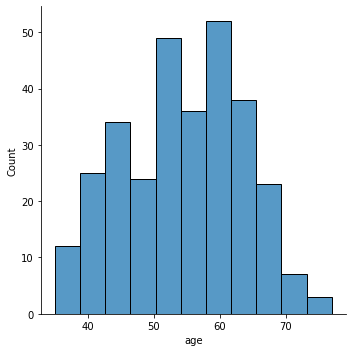

In [34]:
outlier_check('age')

Variable:  trtbps
Minimum value:  94
1st percentile:  100.0
99th percentile:  180.0
Maximum value:  200


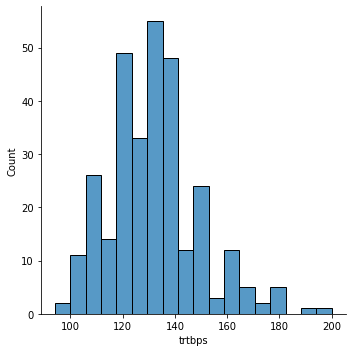

In [35]:
outlier_check('trtbps')

Variable:  chol
Minimum value:  126
1st percentile:  149.0
99th percentile:  406.74000000000024
Maximum value:  564


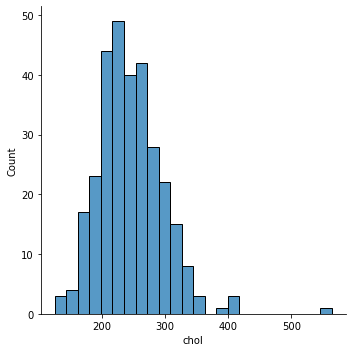

In [36]:
outlier_check('chol')

Variable:  thalachh
Minimum value:  71
1st percentile:  95.02
99th percentile:  191.96000000000004
Maximum value:  202


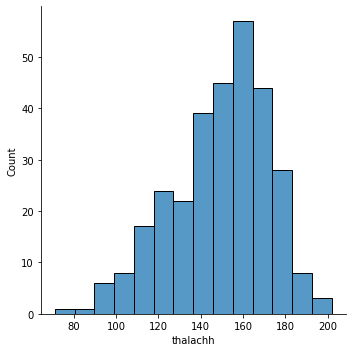

In [37]:
outlier_check('thalachh')

Variable:  sex
Minimum value:  0
1st percentile:  0.0
99th percentile:  1.0
Maximum value:  1


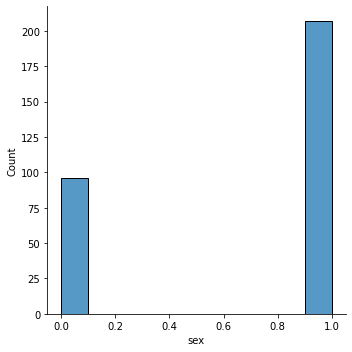

In [38]:
outlier_check('sex')

In [67]:
#Describe the data's summary statistics
narrow_data.describe()

,age,trtbps,chol,thalachh,sex,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,0.683168,0.544554
std,9.082101,17.538143,51.830751,22.905161,0.466011,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,1.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,1.000000,1.000000


In [106]:
#sample of narrow data
narrow_data.head()

,age,trtbps,chol,thalachh,sex,output
0,63,145,233,150,1,1
1,37,130,250,187,1,1
2,41,130,204,172,0,1
3,56,120,236,178,1,1
4,57,120,354,163,0,1


In [107]:
narrow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   trtbps    303 non-null    int64
 2   chol      303 non-null    int64
 3   thalachh  303 non-null    int64
 4   sex       303 non-null    int64
 5   output    303 non-null    int64
dtypes: int64(6)
memory usage: 14.3 KB


In [68]:
#heart attack chance in relation to heart rate
ht_yes = narrow_data[narrow_data['output']==1]['thalachh']
ht_no = narrow_data[narrow_data['output']==0]['thalachh']
fig = ff.create_distplot([ht_no, ht_yes],['No heart attack', 'Heart attack']
                         , bin_size=1, curve_type='normal')
fig.update_layout(
    title="Heart Attack chance in relation to heart rate",
    xaxis_title="Heart Rate",
)
fig.show()

In [61]:
#heart attack chance in relation to cholesterol
ht_yes = full_data[full_data['output']==1]['chol']
ht_no = full_data[full_data['output']==0]['chol']
fig = ff.create_distplot([ht_no, ht_yes],['No heart attack', 'Heart attack']
                         , bin_size=1, curve_type='normal')
fig.update_layout(
    title="Heart Attack chance in relation to cholesterol",
    xaxis_title="Cholesterol ",
)
fig.show()

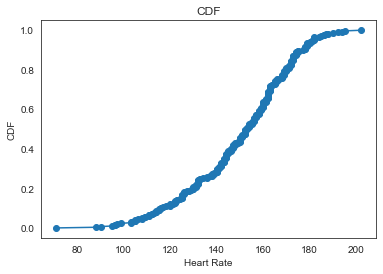

In [69]:
#Checking normality of distribution

N = 303

data_cdf = narrow_data.thalachh
  
# sort
x = np.sort(data_cdf)
  
# get the cdf values
y = np.arange(N) / float(N)
  
# make graph
plt.xlabel('Heart Rate')
plt.ylabel('CDF')
  
plt.title('CDF')
  
plt.plot(x, y, marker='o')

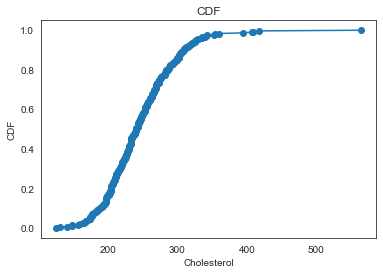

In [70]:
#Checking normality of distribution
N = 303

data_cdf = full_data.chol
  
# sort
x = np.sort(data_cdf)
  
# get the cdf values
y = np.arange(N) / float(N)
  
# make graph
plt.xlabel('Cholesterol')
plt.ylabel('CDF')
  
plt.title('CDF')
  
plt.plot(x, y, marker='o')

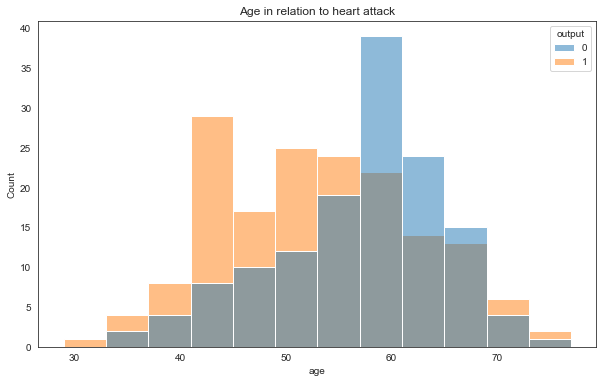

In [71]:
####Not used###
#Age in relation to heart attack
plt.figure(figsize=(10,6))
sns.histplot(data = narrow_data, x = 'age', hue = 'output')
plt.title("Age in relation to heart attack")
plt.show()

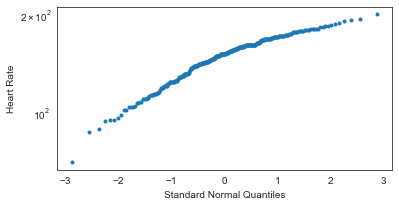

In [72]:
#Analytical Distribution for heart rate

from matplotlib import pyplot
import probscale

fig, ax = pyplot.subplots(figsize=(6, 3))
fig = probscale.probplot(narrow_data['thalachh'], ax=ax, plottype='qq', datascale='log',
                         problabel='Standard Normal Quantiles', datalabel='Heart Rate',
                         scatter_kws=dict(marker='.', linestyle='none', label='Heart Rate'))

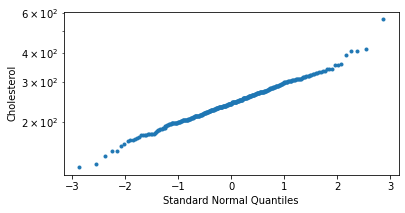

In [14]:
#Analytical Distribution for cholesterol

from matplotlib import pyplot
import probscale

fig, ax = pyplot.subplots(figsize=(6, 3))
fig = probscale.probplot(full_data['chol'], ax=ax, plottype='qq', datascale='log',
                         problabel='Standard Normal Quantiles', datalabel='Cholesterol',
                         scatter_kws=dict(marker='.', linestyle='none', label='Cholesterol'))

In [82]:
#Scatterplot
color = ['red','blue']
fig = go.Figure()
for i in narrow_data['output'].unique():
    fig.add_trace(go.Scatter(x=narrow_data[narrow_data['output']==i]['chol'],
                            y=narrow_data[narrow_data['output']==i]['thalachh'],
                            mode='markers', name=str(i),showlegend = True,
                            marker = dict(color = color[i],size = 16,
                                          opacity = 0.65,line=dict(color='black', width=0.9))))
    
fig.update_layout(title=dict(text='Cholesterol & Heart Rate',
                               y=0.9,x=0.5,xanchor= 'center',yanchor= 'top'),
                               xaxis = dict(title='Cholesterol'),
                               yaxis =dict(title='Heart Rate'),template='plotly_white')

iplot(fig)

<AxesSubplot:xlabel='age', ylabel='thalachh'>

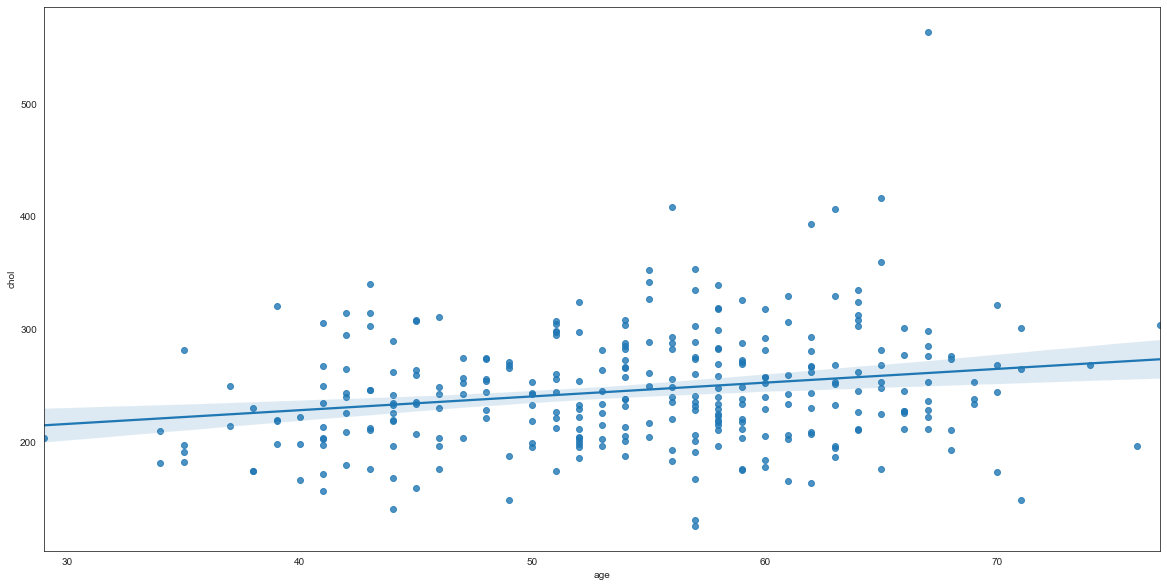

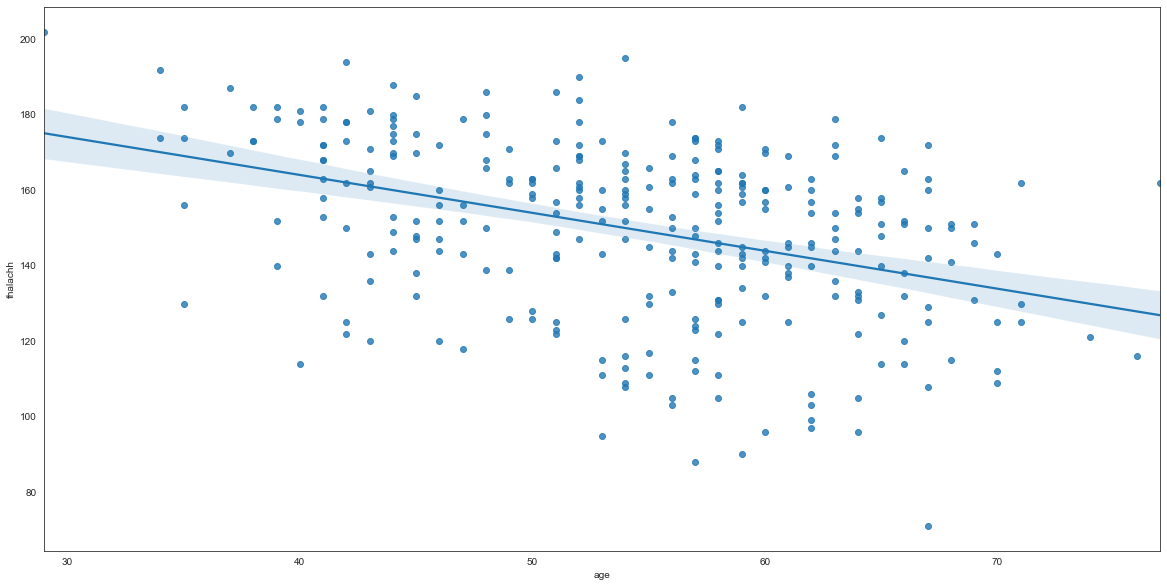

In [98]:
#scatterplot
plt.figure(figsize = (20,10))
sns.regplot(x=narrow_data['age'],y=narrow_data['chol'])

plt.figure(figsize = (20,10))
sns.regplot(x=narrow_data['age'],y=narrow_data['thalachh'])

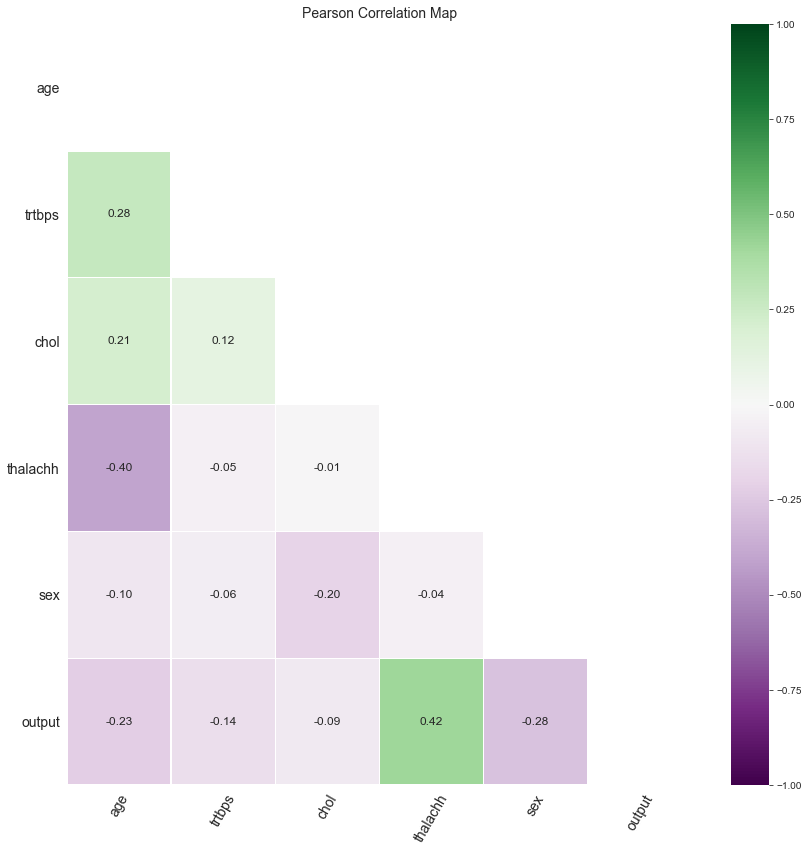

In [81]:
#pearson correlation
sns.set_style("white")
matrix = np.triu(narrow_data.corr(method="pearson"))
f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(narrow_data.corr(),annot= True,fmt = ".2f",ax=ax,
            vmin = -1, vmax = 1, mask = matrix, cmap = "PRGn",
            linewidth = 0.4,linecolor = "white",annot_kws={"size": 12})
plt.xticks(rotation=60,size=14)
plt.yticks(rotation=0,size=14)
plt.title('Pearson Correlation Map', size = 14)
plt.show()

In [110]:
#Permutation Test

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [118]:
#Pvalue
data = narrow_data['thalachh'], narrow_data['output']

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print("Heart rate pvalue: " + str(pvalue))

Heart rate pvalue: 0.0


In [119]:
#Pvalue
data = narrow_data['chol'], narrow_data['output']

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print("Cholesterol pvalue: " + str(pvalue))

Cholesterol pvalue: 0.0


In [120]:
#Test data for regression analysis on cholesterol

# Split predictor and target
x_full = narrow_data.drop(['age','trtbps','thalachh','sex','output'], axis = 1)
y_full = narrow_data['output']

# Train-test-split
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size = 0.3, random_state = 1)

print('Train records: %d \nTest records: %d' % (x_train.shape[0], x_test.shape[0]))

Train records: 212 
Test records: 91


                 Model  Train_Accuracy  Test_Accuracy
0  Logistic Regression           59.43          57.14


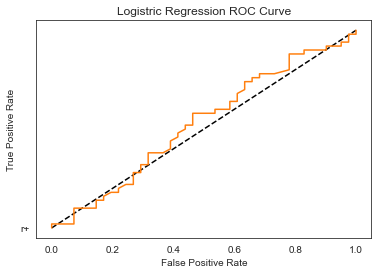

In [121]:
#Logistic regression model
logistic_model =LogisticRegression(max_iter = 1000)
logistic_model.fit(x_train, y_train)
train_predictions = logistic_model.predict(x_train)
test_predictions = logistic_model.predict(x_test)
model_performance = pd.DataFrame([[ 'Logistic Regression', 
                                    round(accuracy_score(y_train, train_predictions)*100,2),
                                    round(accuracy_score(y_test, test_predictions)*100,2)]],
                                   columns = ['Model', 'Train_Accuracy', 'Test_Accuracy'])
print(model_performance)

# Plotting the ROC Curve
fpr,tpr,threshols=roc_curve(y_test,logistic_model.predict_proba(x_test)[:,1])
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()                              

In [104]:
#Test data for regression analysis on heart rate

# Split predictor and target
x_full = narrow_data.drop(['age','trtbps','chol','sex','output'], axis = 1)
y_full = narrow_data['output']

# Train-test-split
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size = 0.3, random_state = 1)

print('Train records: %d \nTest records: %d' % (x_train.shape[0], x_test.shape[0]))

Train records: 212 
Test records: 91


                 Model  Train_Accuracy  Test_Accuracy
0  Logistic Regression           70.28          72.53


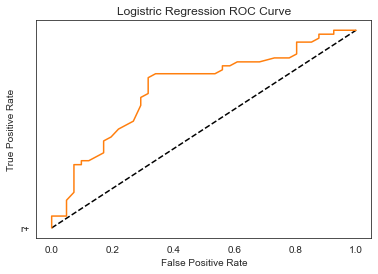

In [105]:
#Logistic regression model
logistic_model =LogisticRegression(max_iter = 1000)
logistic_model.fit(x_train, y_train)
train_predictions = logistic_model.predict(x_train)
test_predictions = logistic_model.predict(x_test)
model_performance = pd.DataFrame([[ 'Logistic Regression', 
                                    round(accuracy_score(y_train, train_predictions)*100,2),
                                    round(accuracy_score(y_test, test_predictions)*100,2)]],
                                   columns = ['Model', 'Train_Accuracy', 'Test_Accuracy'])
print(model_performance)

# Plotting the ROC Curve
fpr,tpr,threshols=roc_curve(y_test,logistic_model.predict_proba(x_test)[:,1])
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()                              